## Import Pandas

Import `Pandas` with the alias `pd` and the `Pyplot` module from the Matplotlib library with the alias `plt`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Time Series

Pandas captures four general time related concepts: \
- **`Date times`**: references to a specific date and time. \
- **`Time spans`**: references to a span of time defined by a point in time and its associated frequency. \
- **`Time deltas`**: references to an absolute time duration. \
- **`Date offsets`**: references to a relative time duration that respects calendar arithmetic. \
\
Pandas provides the following data structures to handle time series data: \
- For **`Date times`**, it provides the scalar class **`Timestamp`** and the array class **`DatetimeIndex`**. \
- For **`Time spans`**, it provides the scalar class **`Period`** and the array class **`PeriodIndex`**. \
- For **`Time deltas`**, it provides the scalar class **`Timedelta`** and the array class **`TimedeltaIndex`**. \
- For **`Date offsets`**, it provides the scalar class **`DateOffset`** but no array class. \
\
Pandas provides the following functions to handle time series data:\
- For **`Date times`**, it provides **`Timestamp`** / **`to_datetime`** and **`date_range`**. \
- For **`Time spans`**, it provides **`Period`** / **`to_period`** and **`period_range`**. \
- For **`Time deltas`**, it provides standard subtraction / **`to_timedelta`** and **`timedelta_range`**. \
- For **`Date offsets`**, it provides **`DateOffset`**. \

## Date times

**`Date times`** data is the most basic type of time series data that associates values with points in time. **`Timestamp`** and **`DatetimeIndex`** objects can be created directly.

In [2]:
# Create a Timestamp object directly
pd.Timestamp('10-05-1995')

Timestamp('1995-10-05 00:00:00')

In [3]:
# Create a DatetimeIndex object directly
pd.DatetimeIndex(['10-05-1995', '10-06-1995'])

DatetimeIndex(['1995-10-05', '1995-10-06'], dtype='datetime64[ns]', freq=None)

Alternatively to the direct creation method, **`Timestamp`** and **`DatetimeIndex`** objects can also be created by converting date-like objects with the function **`pd.to_datetime()`**, which can parse a wide variety of formats and which turns a single date into a Timestamp and a series of dates into a DatetimeIndex.

In [4]:
# Create a Timestamp object with the function pd.to_datetime()
string = '10-05-1995'
pd.to_datetime(string)

Timestamp('1995-10-05 00:00:00')

When passed a list, the function returns a DateTime index

In [5]:
# Create a DatetimeIndex object with the function pd.to_datetime()
list = ['10-05-1995', '10-06-1995']
pd.to_datetime(list)

DatetimeIndex(['1995-10-05', '1995-10-06'], dtype='datetime64[ns]', freq=None)

When passed a series, the function returns a series

In [6]:
# Create a DatetimeIndex object with the function pd.to_datetime()
series = pd.Series(['10-05-1995', '10-06-1995'])
pd.to_datetime(series)

0   1995-10-05
1   1995-10-06
dtype: datetime64[ns]

When a very long index is required, manually typing all the elements becomes cumbersone. For this reason, it is more convenint to use **`pd.date_range()`** whenever timestamps with a regular frequency are needed.

In [7]:
# Create a DatetimeIndex object
pd.date_range(start='10-05-1995', end='10-12-1995')

DatetimeIndex(['1995-10-05', '1995-10-06', '1995-10-07', '1995-10-08',
               '1995-10-09', '1995-10-10', '1995-10-11', '1995-10-12'],
              dtype='datetime64[ns]', freq='D')

In [8]:
# Create a DatetimeIndex object
pd.date_range(start='10-05-1995', end='10-12-1995', freq='B')

DatetimeIndex(['1995-10-05', '1995-10-06', '1995-10-09', '1995-10-10',
               '1995-10-11', '1995-10-12'],
              dtype='datetime64[ns]', freq='B')

In [9]:
# Create a DatetimeIndex object
pd.date_range('10-05-1995', periods=8, freq='D')

DatetimeIndex(['1995-10-05', '1995-10-06', '1995-10-07', '1995-10-08',
               '1995-10-09', '1995-10-10', '1995-10-11', '1995-10-12'],
              dtype='datetime64[ns]', freq='D')

## Time Spans

**`Time spans`** are more often associated with variable changes. The **`Period`** and **`PeriodIndex`** classes can be called directly.

In [10]:
# Create a Period object directly
pd.Period('5 of October 1995')

Period('1995-10-05', 'D')

In [11]:
# Create a PeriodIndex object directly
pd.PeriodIndex(['5 of October 1995', 'October 6, 1995'], freq='D')

PeriodIndex(['1995-10-05', '1995-10-06'], dtype='period[D]', freq='D')

Alternatively to the direct creation method, **`Period`** and **`PeriodIndex`** objects can also be created by converting Timestamp and DatetimeIndex objects with the function **`Timestamp.period()`** or **`DatetimeIndex.period()`**, which turns the former into a Period and the latter into a Period Index.

In [12]:
# Create a Period object with the function Timestamp.to_period()
ts = pd.Timestamp('5 of October 1995')
ts.to_period(freq='D')

Period('1995-10-05', 'D')

In [13]:
# Create a PeriodIndex object with the function DatetimeIndex.to_period()
dti = pd.DatetimeIndex(['5 of October 1995', 'October 6, 1995'])
dti.to_period(freq='D')

PeriodIndex(['1995-10-05', '1995-10-06'], dtype='period[D]', freq='D')

The function **`pd.period_range()`** works similarly to its equivalent for Date times.

## Time deltas

**`Time deltas`** are the results of subtractions between date times. A **`Timedelta objet`** is created from the difference of two Timestamp objects;  a **`TimedeltaIndex`** objet is created from the difference of two DatetimeIndex objects

In [14]:
# Create a Timedelta object
ts1 = pd.Timestamp('10-05-1995') 
ts2 = pd.Timestamp('10-06-1995')
ts2 - ts1

Timedelta('1 days 00:00:00')

In [15]:
dti1 = pd.DatetimeIndex(['10-05-1995', '10-06-1995'])
dti2 = pd.DatetimeIndex(['10-07-1995', '10-08-1995']) 
dti2 - dti1

TimedeltaIndex(['2 days', '2 days'], dtype='timedelta64[ns]', freq=None)

The function **`pd.timedelta_range()`** works similarly to its equivalent for Date times.

## Frequencies

Generalizing on the frequencies mentioned above, the following codes allow to specify any desired frequency spacing: **`D`**: day, **`W`**: Week, **`M`**: Month end, **`Q`**: Quarter end, **`A`**: Year end, **`H`**: Hours, **`T`**: Minutes, **`S`**: Seconds, **`L`**: Milliseonds, **`U`**: Microseconds, **`N`**: Nanoseconds, **`B`**: Business day, **`BM`**: Business month end, **`BQ`**: Business quarter end, **`BA`**: Business year end, **`BH`**: Business hours.\

Since the monthly, quarterly and annual frequencies are marked at the end of the period, to have them marked at the beginning of the period, it is necessary to add an `S` suffix: **`MS`** Month start, **`QS`** Quarter start, **`AS`** Year start, **`BMS`** Business month start, **`BQS`** Business quarter start, **`BAS`** Business year start.\

To change the month used to mark any quarterly or annual code, it is necessary to add a three-letter month code as a suffix : **`Q-JAN`**, **`BQ-FEB`**, **`QS-MAR`**, **`BQS-APR`**, etc..., **`A-JAN`**, **`BA-FEB`**, **`AS-MAR`**, **`BAS-APR`**, etc...\

To change the split-point of the weekly frequency, it is necessary to add a three-letter weekday code: **`W-SUN`**, **`W-MON`**, **`W-TUE`**, **`W-WED`**, etc...\

Codes can be combined with numbers to specify other frequencies. For example, a frequency of 4 hours 20 minutesis given by the combination: **`4H20T`**\

## Offsets

In the preceding sections, frequency strings (e.g. 'D') were used to specify a frequency that defined: \
- how the date times in DatetimeIndex were spaced when using `pd.date_range()` \
- the frequency of a Period or PeriodIndex \ 

These frequency are instances of Pandas **`DateOffset`**, which is similar to a Timedelta that represents a duration of time but follows specific calendar duration rules. For example, a Timedelta day will always increment datetimes by 24 hours, while a DateOffset day will increment datetimes to the same time the next day whether a day represents 23, 24 or 25 hours due to daylight savings time. However, all DateOffset subclasses that are an hour or smaller (Hour, Minute, Second, Milli, Micro, Nano) behave like Timedelta and respect absolute time.

# Downloading Stock Prices

Since `Pandas` was developed mainly for financial application, the **`pandas_datareader`** library extracts data from various Internet sources into a `Pandas` DataFrame.\

Load the price history of Apple Inc from Yahoo Finance.

In [16]:
# Import data
from pandas_datareader import data 

# Download the stock price
apple = data.DataReader('AAPL', data_source='yahoo', start='2009', 
                        end='2018')
print(apple.head())

                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2009-01-02  13.005714  12.165714  12.268572  12.964286  186503800.0   8.611461
2009-01-05  13.740000  13.244286  13.310000  13.511429  295402100.0   8.974896
2009-01-06  13.881429  13.198571  13.707143  13.288571  322327600.0   8.826868
2009-01-07  13.214286  12.894286  13.115714  13.001429  188262200.0   8.636136
2009-01-08  13.307143  12.862857  12.918571  13.242857  168375200.0   8.796504


Plot the closing price.

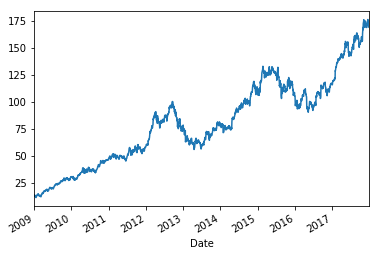

In [17]:
apple = apple['Close']
apple.plot()

# Operations

## Resampling and Converting Frequencies

One frequent need in time series studies is resampling at higher or lower frequencies. This can be done using the method **`resample()`** or the method **`asfreq()`**. The difference between the two is that the former is a data aggregation while the latter is a data selection. \

Resample at the end of business year, using `resample()` to plot the average of the previous year and `asfreq()` to plot the value at the end of the year.

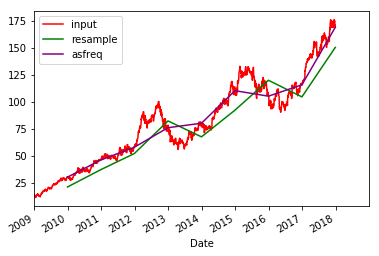

In [18]:
# Plot the closing price
apple.plot(style='-', color='red')

# Plot the resample from resample
apple.resample('BA').mean().plot(color='green')

# Plot the resample from asfred
apple.asfreq('BA').plot(color='purple');

# Add a legend
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

The two methods also allow to resample the business date data at daily frequency, including the weekends.\

Resample at the beginning of the calendar day: in the top sub-plot, non-business days are left as NA; in the bottom subplot, non-business days are filled with a forward-filling and backward-filling approach. 

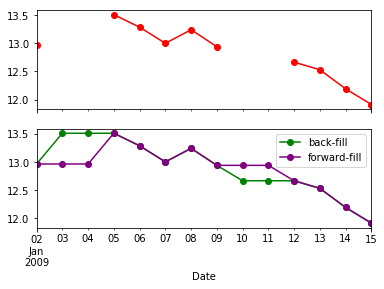

In [19]:
# Create the two subplots
fig, ax = plt.subplots(2, sharex=True)

# Select only the first 10 days
first_days = apple.iloc[:10]

# First subplot
first_days.asfreq('D').plot(ax=ax[0], marker='o', color='red')

# Second subplot
first_days.asfreq('D',method='bfill').plot(ax=ax[1],marker='o',color='green')
first_days.asfreq('D',method='ffill').plot(ax=ax[1],marker='o',color='purple')

# Plot the legend 
ax[1].legend(["back-fill", "forward-fill"]);

## Time Shifts

Another frequent need in time series studies is shifting data in time. This can be done using the method **`shift()`** or the method **`tshift()`**. The difference between the two is that the former shifts the data while the latter shifts the index. In both cases, the shift is specified as a multiple of the frequency. Apply a shift of 900 days.

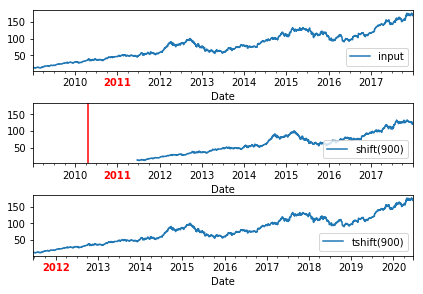

In [20]:
# Create the three subplots
fig, ax = plt.subplots(3, sharey=True)
fig.tight_layout()

# Apply a frequency to the data
apple = apple.asfreq('D', method='pad')

# Plot the series
apple.plot(ax=ax[0])
apple.shift(900).plot(ax=ax[1])
apple.tshift(900).plot(ax=ax[2])

# Plot the legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc='lower right')
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, color='red')

ax[1].legend(['shift(900)'], loc='lower right')
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, color='red')

ax[2].legend(['tshift(900)'], loc='lower right')
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, color='red');

## Rolling Windows

Another frequent need in time series studies is rolling statistics. This can be done using the **`rolling()`** attribute of Series and DataFrames. Compute the one-year centered rolling mean and standard deviation.

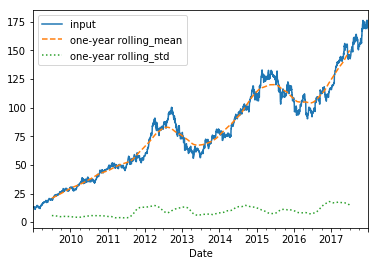

In [21]:
rolling = apple.rolling(365, center=True)
data = pd.DataFrame({'input': apple, 'one-year rolling_mean': rolling.mean(), 
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])